In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

phl = pd.read_csv('datasets/phl_clean.csv', error_bad_lines=False)
phl.head()

,P. Name,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Mean (EU),P. Teq Mean (K),P. Ts Mean (K),P. Surf Press (EU),P. Mag,P. Appar Size (deg),P. Period (days),P. Sem Major Axis (AU),P. Eccentricity,P. Mean Distance (AU),S. Name,S. Constellation,S. Type,S. Mass (SU),S. Radius (SU),S. Teff (K),S. Luminosity (SU),S. Age (Gyrs),S. Distance (pc),S. RA (hrs),S. DEC (deg),S. No. Planets,S. No. Planets HZ,S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI,P. Habitable,P. Hab Moon,P. Confirmed,P. Disc. Method,P. Disc. Year
0,1RXS 1609 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,4451.16,19.04,0.64,12.28,15.29,4.079751e-06,11.4,NaN,2870.4,-10.06,36.81,NaN,330.0,0.0,330.0,1RXS 1609,Sco,K7V,0.73,1.35,4060.0,0.444285,0.011,145.0,16.1583,-21.0828,1,0,0.540,1.362,800.07,23.51,85.62,0.00,0.05,0,0,1,Imaging,2008.00
1,1SWASP J1407 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,10.94,4.86,53.12,24.11,0.02166914,97.7,NaN,30873.8,-18.21,20.91,3725.0,3.9,0.0,3.9,1SWASP J1407,Cen,K,0.90,0.99,4400.0,0.329588,0.016,133.0,14.1300,-39.7619,1,0,0.461,1.143,9.07,15.30,45.41,0.02,0.07,0,0,1,Primary Transit,2012.00
2,2M 0103-55(AB) b,Cold,Jovian,gas,hydrogen-rich,non-habitable,4133.22,11.40,2.79,31.79,19.04,3.961934e-06,11.4,NaN,11520.8,-8.91,21.80,NaN,84.0,0.0,84.0,2M 0103-55(AB),Phe,M,0.40,0.38,3840.0,0.027955,0.030,47.2,1.0600,-55.2656,1,0,0.136,0.347,793.67,12.57,107.44,0.00,0.06,0,0,1,Imaging,2013.00
3,2M 0122-24 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,11.20,4.53,50.69,23.83,1.033854e-05,14.4,NaN,28780.4,-9.92,21.41,NaN,52.0,0.0,52.0,2M 0122-24,Cet,M3.5,0.40,0.38,3840.0,0.027955,0.120,36.0,1.3808,-24.6142,1,0,0.136,0.347,490.45,15.72,119.46,0.00,0.08,0,0,1,Imaging,2013.00
4,2M 0219-39 b,Cold,Jovian,gas,hydrogen-rich,non-habitable,4419.37,16.13,1.05,16.99,16.55,2.368772e-07,5.6,NaN,4655.6,-6.60,31.03,NaN,156.0,0.0,156.0,2M 0219-39,For,M6,0.11,0.27,3064.0,0.005765,NaN,39.4,2.3228,-39.4231,1,0,0.062,0.165,3028.82,19.46,133.25,0.00,0.06,0,0,1,Imaging,2015.00


## Potentially habitable planets

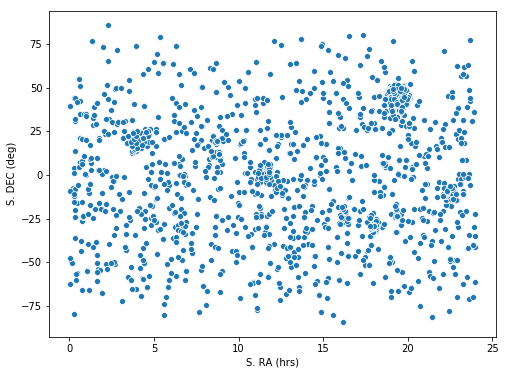

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='S. RA (hrs)', y='S. DEC (deg)', data=phl)

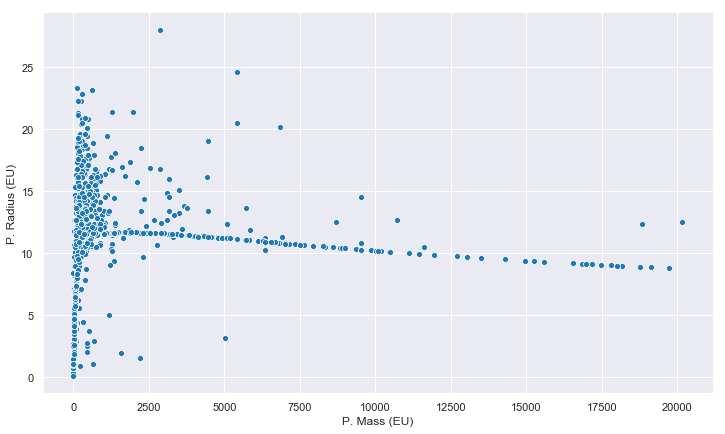

In [105]:
# P. Mass against Radius 

plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
sns.scatterplot(y='P. Radius (EU)', x='P. Mass (EU)', data=phl)
sns.despine()

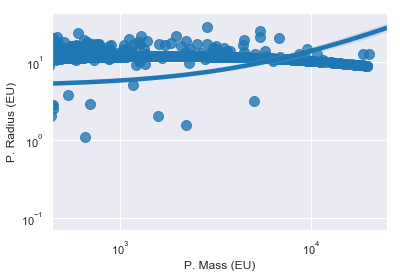

In [113]:
# Log scale for MASS/RADIUS

fig, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
sns.regplot('P. Mass (EU)', 'P. Radius (EU)', phl, ax=ax, scatter_kws={"s": 100})
plt.show()

In [ ]:
g = sns.factorplot("class", "survived", "sex", data=phl, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()

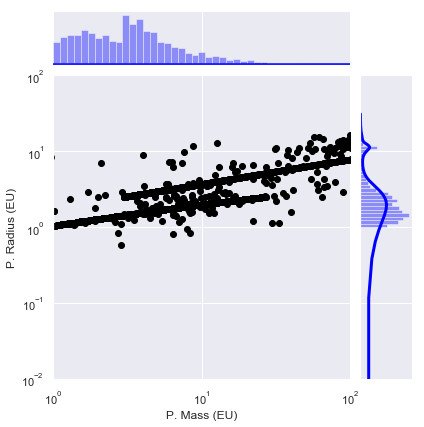

In [108]:
mybins=np.logspace(0,np.log(100),100)

g = sns.JointGrid(,xlim=[1,100],ylim=[0.01,100])
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue',bins=mybins)
g.plot_joint(plt.scatter, color='black', edgecolor='black')
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

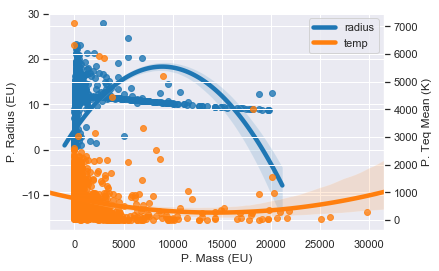

In [101]:
fig, ax = plt.subplots()
ax2 = ax.twinx() #This allows the common axes (flow rate) to be shared
sns.regplot(x="P. Mass (EU)", y="P. Radius (EU)", data=phl, order=2, ax=ax)
sns.regplot(x="P. Mass (EU)", y="P. Teq Mean (K)", data=phl, order=2, ax=ax2) 
#ax2.set_ylim(0,1) #This is used to set the limit for efficiency. Without this being set, the curves do not line up.
ax2.legend(handles=[a.lines[0] for a in [ax,ax2]], 
           labels=["radius", "temp"])
plt.show()

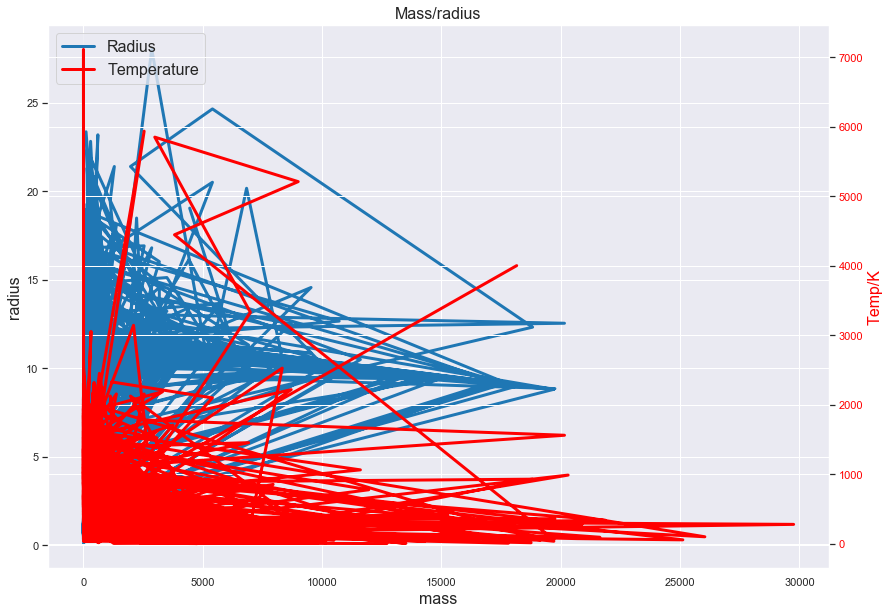

In [85]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)
ax1.plot(phl['P. Mass (EU)'], phl['P. Radius (EU)'], label='Radius')
ax1.set_title('Mass/radius', fontsize=16)
ax1.set_xlabel('mass', fontsize=16,)
ax1.set_ylabel('radius', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(phl['P. Mass (EU)'], phl['P. Teq Mean (K)'], 'r-', label='Temperature')
ax2.set_ylabel('Temp/K', color='r', fontsize=16)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2, fontsize=16)

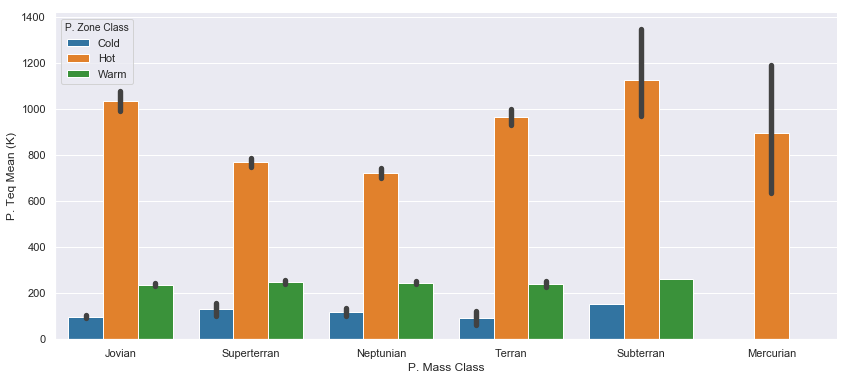

In [74]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=phl['P. Mass Class'], y = "P. Teq Mean (K)", hue = "P. Zone Class", data=phl)
sns.despine()

In [ ]:
sns.scatterplot(x='', y='', data=phl)